In [398]:
import sys
import networkx as nx
import numpy as np
from scipy.special import gamma, loggamma
import matplotlib.pyplot as plt

In [361]:
def load_gph(names, filename):
    '''
    Load the graph from a gph file
    
    Args:
        names is a numpy array of shape (m,)
        names[i] is the name of the i-th variable
        filename is the name of the gph file
    Returns:
        dag is a networkx DiGraph
    '''
    dag = nx.DiGraph()
    with open(filename, 'r') as f:
        lines = f.readlines()
    for line in lines:
        line = line.strip()
        if line == "":
            continue
        nodes = line.split(",")
        # remove the leading and trailing spaces
        nodes = [node.strip() for node in nodes]
        dag.add_edge(np.where(names == nodes[0].strip())[0][0], np.where(names == nodes[1].strip())[0][0])
    return dag

In [4]:
def load_csv(infile):
    with open(infile, 'r') as f:
        lines = f.readlines()

    lines = [line.strip() for line in lines]
    names = lines[0].split(",")
    data = [line.split(",") for line in lines[1:]]

    return np.array(names), np.array(data, dtype=int)

In [276]:
names, data = load_csv("./example/example.csv")

In [362]:
names, data = load_csv("./data/small.csv")

In [400]:
names, data = load_csv("./data/medium.csv")

In [403]:
names, data = load_csv("./data/large.csv")

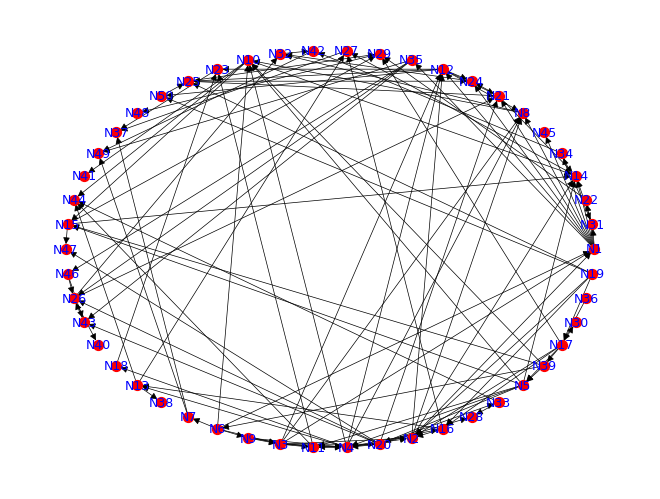

In [404]:
filename = "./submission/large.gph"
dag = load_gph(names, filename)
# put names of nodes in the graph
nx.relabel_nodes(dag, dict(zip(range(len(names)), names)), copy=False)
# draw the graph
nx.draw(
    dag, 
    pos=nx.circular_layout(dag), 
    with_labels=True, 
    node_size=50, 
    node_color='r',
    width=0.5,
    font_size=9,
    font_color='b')
plt.savefig("./submission/large.png")

In [216]:
def load_gph(names, filename):
    dag = nx.DiGraph()
    with open(filename, 'r') as f:
        lines = f.readlines()
    for line in lines:
        line = line.strip()
        if line == "":
            continue
        nodes = line.split(",")
        # get rid of spaces
        nodes = [node.strip() for node in nodes]
        # # get rid of quotes
        # nodes = [node.strip('"') for node in nodes]
        dag.add_edge(np.where(names == nodes[0].strip())[0][0], np.where(names == nodes[1].strip())[0][0])
    return dag

In [277]:
load_gph(names, "./submission/small.gph")

IndexError: index 0 is out of bounds for axis 0 with size 0

"age"
['"age"' '"portembarked"' '"fare"' '"numparentschildren"'
 '"passengerclass"' '"sex"' '"numsiblings"' '"survived"']
(array([0], dtype=int64),)
"portembarked"
['"age"' '"portembarked"' '"fare"' '"numparentschildren"'
 '"passengerclass"' '"sex"' '"numsiblings"' '"survived"']
(array([1], dtype=int64),)
"fare"
['"age"' '"portembarked"' '"fare"' '"numparentschildren"'
 '"passengerclass"' '"sex"' '"numsiblings"' '"survived"']
(array([2], dtype=int64),)
"numparentschildren"
['"age"' '"portembarked"' '"fare"' '"numparentschildren"'
 '"passengerclass"' '"sex"' '"numsiblings"' '"survived"']
(array([3], dtype=int64),)
"numparentschildren"
['"age"' '"portembarked"' '"fare"' '"numparentschildren"'
 '"passengerclass"' '"sex"' '"numsiblings"' '"survived"']
(array([3], dtype=int64),)
"passengerclass"
['"age"' '"portembarked"' '"fare"' '"numparentschildren"'
 '"passengerclass"' '"sex"' '"numsiblings"' '"survived"']
(array([4], dtype=int64),)
"passengerclass"
['"age"' '"portembarked"' '"fare"' '"n

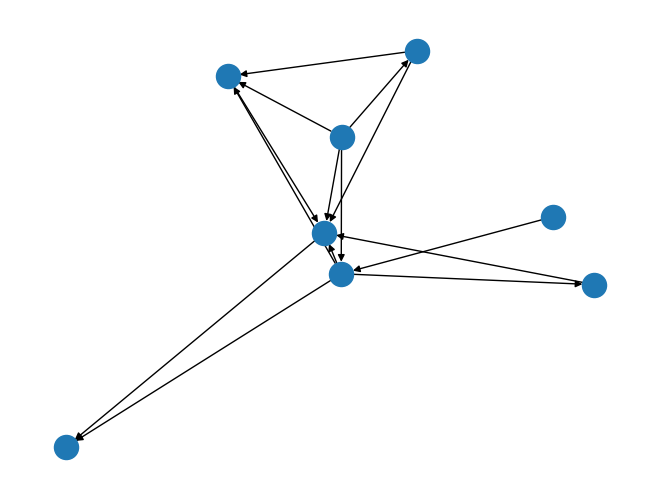

In [174]:
nx.draw(load_gph(names, "./submission/small.gph"))

In [129]:
# find the index of the variable with the given name
np.where(names == 'parent2')[0][0]

2

In [217]:
def compute_data_range(data):
    '''
    Compute the range of each variable in the data set

    Input:
        data is a numpy array of shape (n, m)
        - n is the number of data points
        - m is the number of variables
    Output:
        data_range is a numpy array of shape (m, 3)
        data_range[i, 0] is the minimum value of the i-th variable
        data_range[i, 1] is the maximum value of the i-th variable
        data_range[i, 2] is the number of possible values of the i-th variable
    '''
    data_range = np.zeros((data.shape[1], 3), dtype=int)
    for i in range(data.shape[1]):
        data_range[i, 0] = np.min(data[:, i])
        data_range[i, 1] = np.max(data[:, i])
        data_range[i, 2] = data_range[i, 1] - data_range[i, 0] + 1
    return data_range

In [332]:
data_range = compute_data_range(data)

In [333]:
data_range

array([[1, 4, 4],
       [1, 2, 2],
       [1, 3, 3],
       [1, 4, 4],
       [1, 4, 4],
       [1, 4, 4],
       [1, 4, 4],
       [1, 3, 3],
       [1, 4, 4],
       [1, 4, 4],
       [1, 4, 4],
       [1, 2, 2],
       [1, 2, 2],
       [1, 2, 2],
       [1, 2, 2],
       [1, 4, 4],
       [1, 2, 2],
       [1, 2, 2],
       [1, 4, 4],
       [1, 2, 2],
       [1, 2, 2],
       [1, 4, 4],
       [1, 3, 3],
       [1, 2, 2],
       [1, 2, 2],
       [1, 2, 2],
       [1, 4, 4],
       [1, 4, 4],
       [1, 3, 3],
       [1, 3, 3],
       [1, 4, 4],
       [1, 3, 3],
       [1, 2, 2],
       [1, 4, 4],
       [1, 4, 4],
       [1, 2, 2],
       [1, 2, 2],
       [1, 3, 3],
       [1, 3, 3],
       [1, 3, 3],
       [1, 3, 3],
       [1, 2, 2],
       [1, 3, 3],
       [1, 4, 4],
       [1, 2, 2],
       [1, 2, 2],
       [1, 3, 3],
       [1, 4, 4],
       [1, 2, 2],
       [1, 2, 2]])

In [335]:
import time
def bayesian_score(data, dag):
    '''
    Compute the Bayesian score of the given DAG

    Input:
        data is a numpy array of shape (n, m)
        - n is the number of data points
        - m is the number of variables
        dag is a directed acyclic graph
    Output:
        score is a float
    '''
    # start = time.time()
    n, m = data.shape
    score = 0
    data_range = compute_data_range(data)
    # # print("1", time.time() - start)
    # ith node loop
    for node in dag.nodes:
        # start_node = time.time()
        # start = time.time()
        parent_set = [p for p in dag.predecessors(node)]
        parent_set = sorted(parent_set)
        a_ij0 = data_range[node, -1]
        # print("2", time.time() - start)
        if len(parent_set) == 0:
            # start = time.time()
            # node has no parent
            outcomes = data[:, node]
            unique_rows, counts = np.unique(outcomes, axis=0, return_counts=True)

            m_ij = counts
            m_ij0 = np.sum(m_ij)
            score += loggamma(a_ij0) - loggamma(a_ij0+m_ij0)

            # print("3", time.time() - start)
            # start = time.time()
            # k-th node value loop
            for m_ijk in m_ij:
                score += loggamma(1+m_ijk)
            # print("4", time.time() - start)
        else:
            # start = time.time()
            # node has parent
            p_outcomes = data[:, parent_set]
            p_unique_rows, p_counts = np.unique(p_outcomes, axis=0, return_counts=True)

            outcomes = np.column_stack([p_outcomes, data[:, node]])
            unique_rows, counts = np.unique(outcomes, axis=0, return_counts=True)
            # print("5", time.time() - start)
            for idx, p_count in enumerate(p_counts):
                # start = time.time()
                m_ij0 = p_count
                score += loggamma(a_ij0) - loggamma(a_ij0+m_ij0)

                m_ij = counts[np.all(unique_rows[:, :-1] == p_unique_rows[idx], axis=1)]
                for m_ijk in m_ij:
                    score += loggamma(1+m_ijk)
                # print("6", time.time() - start)
        # print("end node", time.time() - start_node)
    return score

In [88]:
def bayesian_score_v2(data, dag):
    '''
    Compute the Bayesian score of the given DAG

    Input:
        data is a numpy array of shape (n, m)
        - n is the number of data points
        - m is the number of variables
        dag is a directed acyclic graph
    Output:
        score is a float
    '''
    n, m = data.shape
    score = 0
    data_range = compute_data_range(data)
    # memorize loggamma values
    loggamma_dict = {}
    def get_loggamma(x):
        if x in loggamma_dict:
            return loggamma_dict[x]
        else:
            loggamma_dict[x] = loggamma(x)
            return loggamma_dict[x]
            
    # ith node loop
    for node in dag.nodes:
        parent_set = [p for p in dag.predecessors(node)]
        parent_set = sorted(parent_set)
        a_ij0 = data_range[node, -1]
        if len(parent_set) == 0:
            # node has no parent
            outcomes = data[:, node]
            unique_rows, counts = np.unique(outcomes, axis=0, return_counts=True)

            m_ij = counts
            m_ij0 = np.sum(m_ij)
            score += get_loggamma(a_ij0) - get_loggamma(a_ij0+m_ij0)

            # k-th node value loop
            for m_ijk in m_ij:
                score += get_loggamma(1+m_ijk)
        else:
            # node has parent
            p_outcomes = data[:, parent_set]
            p_unique_rows, p_counts = np.unique(p_outcomes, axis=0, return_counts=True)

            outcomes = np.column_stack([p_outcomes, data[:, node]])
            unique_rows, counts = np.unique(outcomes, axis=0, return_counts=True)
            for idx, p_count in enumerate(p_counts):
                m_ij0 = p_count
                score += get_loggamma(a_ij0) - get_loggamma(a_ij0+m_ij0)

                m_ij = counts[np.all(unique_rows[:, :-1] == p_unique_rows[idx], axis=1)]
                for m_ijk in m_ij:
                    score += get_loggamma(1+m_ijk)
    return score

In [336]:
unique_dict = {}
def fast_unique(node_set):
    str_node_set = str(node_set)
    if str_node_set in unique_dict:
        return unique_dict[str_node_set]
    else:
        outcomes = data[:, node_set]
        unique_rows, counts = np.unique(outcomes, axis=0, return_counts=True)
        unique_dict[str_node_set] = [unique_rows, counts]
        return [unique_rows, counts]

In [337]:
def fast_bayesian_score(data, dag):
    n, m = data.shape
    score = 0
    data_range = compute_data_range(data)
    # ith node loop
    for node in dag.nodes:
        parent_set = [p for p in dag.predecessors(node)]
        parent_set = sorted(parent_set)
        a_ij0 = data_range[node, -1]
        if len(parent_set) == 0:
            # node has no parent
            unique_rows, counts = fast_unique([node])

            m_ij = counts
            m_ij0 = np.sum(m_ij)
            score += loggamma(a_ij0) - loggamma(a_ij0+m_ij0)

            # k-th node value loop
            for m_ijk in m_ij:
                score += loggamma(1+m_ijk)
        else:
            # node has parent
            p_outcomes = data[:, parent_set]
            p_unique_rows, p_counts = fast_unique(parent_set)

            parent_set.append(node)
            unique_rows, counts = fast_unique(parent_set)

            # j-th parent loop
            for idx, p_count in enumerate(p_counts):
                m_ij0 = p_count
                score += loggamma(a_ij0) - loggamma(a_ij0+m_ij0)

                # k-th node value loop
                m_ij = counts[np.all(unique_rows[:, :-1] == p_unique_rows[idx], axis=1)]
                for m_ijk in m_ij:
                    score += loggamma(1+m_ijk)
    return score

In [267]:
a = np.array([1,2,3])
b = 5
print(a)

[1 2 3]


In [269]:
np.append(a, b)

array([1, 2, 3, 5])

In [270]:
a

array([1, 2, 3])

In [197]:
loggamma_dict = {}
def get_loggamma(x):
    if x in loggamma_dict:
        return loggamma_dict[x]
    else:
        loggamma_dict[x] = loggamma(x)
        return loggamma_dict[x]

In [339]:
n,m = data.shape
print(n,m)

10000 50


In [283]:
test_graph = nx.DiGraph()
test_graph.add_edges_from([(0, 1), (2, 3), (4, 5)])

In [349]:
test_graph = nx.DiGraph()
test_graph.add_nodes_from(range(m))

In [346]:
# iterate all possible graph structure
for i in range(m):
    for j in range(m):
        if i == j:
            continue
        test_graph.add_edge(i, j)
        # print(test_graph.edges)
        # test_graph.remove_edge(i, j)

In [206]:
nx.is_directed_acyclic_graph(test_graph)

True

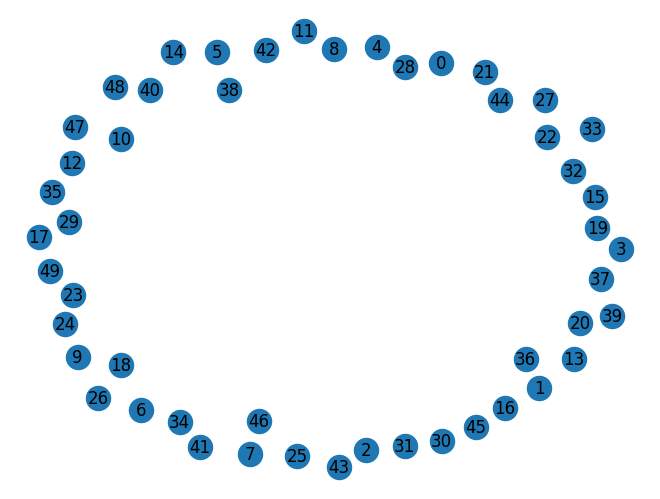

In [350]:
nx.draw(test_graph, with_labels=True)

In [352]:
%timeit fast_bayesian_score(data, test_graph)

2.45 ms ± 96.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [353]:
# measure speed
%timeit bayesian_score(data, test_graph)

146 ms ± 2.67 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [231]:
# measure speed
%timeit bayesian_score_fast(data, test_graph)

830 µs ± 7.08 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [351]:
fast_bayesian_score(data, test_graph)

-487070.76089484774

end node 0.0
end node 0.0
end node 0.0
end node 0.0009999275207519531
end node 0.0
end node 0.0


-132.02362143513773

In [303]:
test_graph.edges()

OutEdgeView([(0, 1), (2, 3), (4, 5)])

In [285]:
bayesian_score(data, test_graph)

-132.02362143513773

In [317]:
np.log(gamma(3) / gamma(889+3))

C:\Users\ralte\AppData\Local\Temp\ipykernel_16172\2085408056.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(gamma(3) / gamma(889+3))


-inf

In [48]:
graph = nx.gnm_random_graph(m, m * (m - 1) // 2, directed=True)

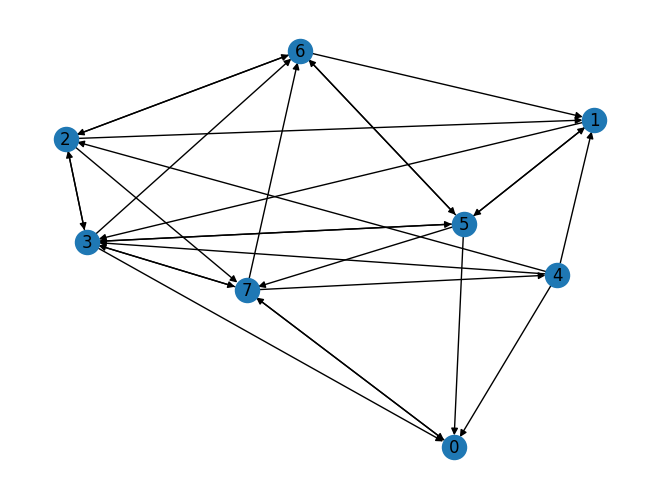

In [176]:
nx.draw(graph, with_labels=True)

In [139]:
node = 0

parent_set = [p for p in graph.predecessors(node)]
parent_set = sorted(parent_set)
print(node, parent_set)

0 [3, 4, 5, 7]


In [140]:
print(data.shape)

(889, 8)


In [169]:
all_comb = data[:, node]
print(all_comb)

[1 2 1 2 2 2 3 1 2 1 1 3 1 2 1 3 1 2 2 2 2 2 1 2 1 2 2 1 2 2 2 2 2 3 2 2 2
 1 1 1 2 2 2 1 1 2 2 2 2 1 1 1 2 2 3 2 1 2 1 1 1 2 1 2 2 2 1 1 1 2 1 1 1 2
 1 2 2 1 2 1 2 2 2 1 2 1 2 1 1 2 1 2 1 3 2 3 1 2 2 2 2 1 2 2 2 1 2 2 2 2 1
 1 1 1 1 3 2 1 1 1 2 2 2 3 1 2 1 2 2 2 1 2 2 1 1 1 2 1 1 2 1 1 1 1 1 2 1 2
 2 2 1 3 2 2 2 1 2 2 2 2 2 1 1 1 1 2 2 2 2 3 1 1 1 3 1 2 2 2 2 2 2 1 1 1 2
 2 2 2 2 2 1 1 1 2 3 2 2 2 1 2 2 2 2 1 1 2 1 1 2 1 2 1 2 2 2 2 2 2 2 1 2 2
 2 2 1 1 1 1 2 2 2 3 1 1 2 2 1 1 2 2 2 2 1 2 2 1 1 2 3 2 2 3 2 2 2 2 2 2 2
 2 1 2 2 2 2 1 1 3 2 2 1 2 2 2 3 2 2 1 2 3 2 1 1 2 2 2 1 2 1 1 1 2 1 1 2 1
 1 2 2 2 2 1 2 2 1 2 1 2 2 1 1 1 2 2 1 1 3 2 2 1 2 2 1 2 2 3 2 2 1 2 2 2 1
 2 2 2 2 2 2 1 1 2 1 2 1 2 2 1 2 1 2 1 1 2 2 1 2 2 2 2 2 2 2 2 2 3 2 2 1 1
 1 1 1 1 2 1 2 1 1 2 1 2 2 2 1 1 2 2 1 2 1 2 1 1 1 2 2 1 2 2 1 1 2 1 2 2 1
 1 2 2 2 2 2 2 2 2 1 2 1 2 1 2 2 1 2 2 1 2 2 2 2 2 1 2 1 1 1 3 2 2 1 1 2 2
 1 1 2 1 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 3 2 1 2 2 2 1 1 2 2 2 1 1 1 2
 2 3 1 2 2 3 2 1 2 1 3 3 

In [170]:
unique_rows, counts = np.unique(all_comb, axis=0, return_counts=True)

In [171]:
unique_rows, counts

(array([1, 2, 3]), array([319, 521,  49], dtype=int64))

In [141]:
parent_data = data[:, parent_set]
print(parent_data.shape)
# print(parent_data)

(889, 4)


In [142]:
print(data[:, node].shape)
# print(data[:, node])

(889,)


In [143]:
parent_data = np.column_stack([parent_data, data[:, node]])
print(parent_data.shape)
# print(parent_data)

(889, 5)


In [144]:
unique_rows, counts = np.unique(parent_data, axis=0, return_counts=True)
print(unique_rows.shape, counts.shape)
print(unique_rows)
print(counts)

(57, 5) (57,)
[[1 1 1 1 1]
 [1 1 1 1 2]
 [1 1 1 1 3]
 [1 1 1 2 1]
 [1 1 1 2 2]
 [1 1 2 1 1]
 [1 1 2 1 2]
 [1 1 2 2 1]
 [1 1 2 2 2]
 [1 1 2 2 3]
 [1 2 1 1 1]
 [1 2 1 1 2]
 [1 2 1 1 3]
 [1 2 1 2 1]
 [1 2 1 2 2]
 [1 2 1 2 3]
 [1 2 2 1 2]
 [1 2 2 2 1]
 [1 2 2 2 2]
 [1 2 2 2 3]
 [1 3 1 1 1]
 [1 3 1 1 2]
 [1 3 1 1 3]
 [1 3 1 2 1]
 [1 3 1 2 2]
 [1 3 1 2 3]
 [1 3 2 1 1]
 [1 3 2 1 2]
 [1 3 2 1 3]
 [1 3 2 2 1]
 [1 3 2 2 2]
 [1 3 2 2 3]
 [2 1 1 1 1]
 [2 1 1 1 2]
 [2 1 1 2 1]
 [2 1 2 1 1]
 [2 1 2 1 2]
 [2 1 2 2 1]
 [2 1 2 2 2]
 [2 2 1 1 1]
 [2 2 1 1 2]
 [2 2 1 1 3]
 [2 2 1 2 1]
 [2 2 1 2 2]
 [2 2 2 1 1]
 [2 2 2 2 1]
 [2 2 2 2 2]
 [2 3 1 1 1]
 [2 3 1 1 2]
 [2 3 1 2 1]
 [2 3 2 2 1]
 [2 3 2 2 2]
 [2 3 2 2 3]
 [3 1 1 1 2]
 [3 1 2 1 2]
 [3 1 2 2 2]
 [3 2 1 1 3]]
[108 168   6  19  25  23  25  29  32   1   6  50  17   4  33   3   1  19
  51   8  26  54   8   8   6   1   2   3   1  19  37   1  10   6   3  10
   8   6   3   1   1   1   4   1   2   8   3   1   2   2   9   3   1   2
   6   1   1]


In [160]:
parent_values = unique_rows[0, :-1]
print(parent_values)

[1 1 1 1]


In [163]:
counts[np.all(unique_rows[:, :-1] == parent_values, axis=1)]

array([108, 168,   6], dtype=int64)

In [145]:
p_table = dict(zip(map(tuple, unique_rows), counts))
# print(p_table)

In [158]:
parent_combination, count = p_table.items().__iter__().__next__()

TypeError: expected 0 arguments, got 1

In [157]:
parent_combination, count

((1, 1, 1, 1, 1), 108)

In [148]:
parent_values = parent_combination[:-1]
node_value = parent_combination[-1]
print(parent_values)
print(node_value)

(1, 1, 1, 1)
1


In [149]:
filtered_data = data[np.all(parent_data[:, :-1] == parent_values, axis=1), node]

In [153]:
filtered_data.size

282

In [94]:
# count the number of times the filtered_data is 1
np.equal(filtered_data, '1').sum()

108

In [95]:
np.equal(filtered_data, '2').sum()

168

In [288]:
def find_bn_structure(data, num_restarts=10):
    """Finds a good Bayesian network structure for the given data using hill climbing."""
    n, m = data.shape
    best_score = -np.inf
    best_graph = None
    for i in range(num_restarts):
        graph = nx.gnm_random_graph(m, m * (m - 1) // 2, directed=True)
        while True:
            improved = False
            for node1 in graph.nodes:
                for node2 in graph.nodes:
                    if node1 >= node2:
                        continue
                    graph.add_edge(node1, node2)
                    score = bayesian_score(data, graph)
                    print(score)
                    if score > best_score:
                        best_score = score
                        best_graph = graph.copy()
                        improved = True
                        break
                    graph.remove_edge(node1, node2)
                if improved:
                    break
            if not improved:
                break
    return best_graph

In [289]:
best_graph = find_bn_structure(data)

-133.76435503133374
-133.76435503133374
-132.83018188193367
-132.36999999098643
-132.36999999098643
-132.83018188193367
-134.0138158909653
-134.22453692228098
-136.19884654585798
-135.56785965544566
-135.64742752512674
-131.61762148404222
-131.15743959309498
-131.15743959309498
-130.2232664436949
-129.76308455274767
-129.76308455274767
-130.2232664436949
-132.39218405608767
-131.40690045272655
-132.16904050477348
-131.53805361436113
-133.08533123664762
-131.61762148404222
-134.17971777252137
-133.95324838423755
-133.28404632784992
-135.20236852038641
-132.97389139954612
-132.31199676249028
-133.02576323025295
-125.64479486635325
-125.64479486635325
-126.26098100577707
-127.51360788629566
-127.4446150148087
-127.65533604612438
-125.88936922287306
-126.5203561132854
-125.96893709255416
-128.5310333810333
-129.2323773287974
-128.44206639978384
-128.18378330218684
-125.36810243689227
-124.75191629746844
-124.75191629746844
-123.97374739654494
-123.35756125712113
-123.35756125712113
-123.97

In [290]:
bayesian_score(data, best_graph)

-123.35756125712113

In [26]:
n, m = data.shape

In [41]:
graph = nx.gnm_random_graph(m, m * (m - 1) // 2, directed=True)

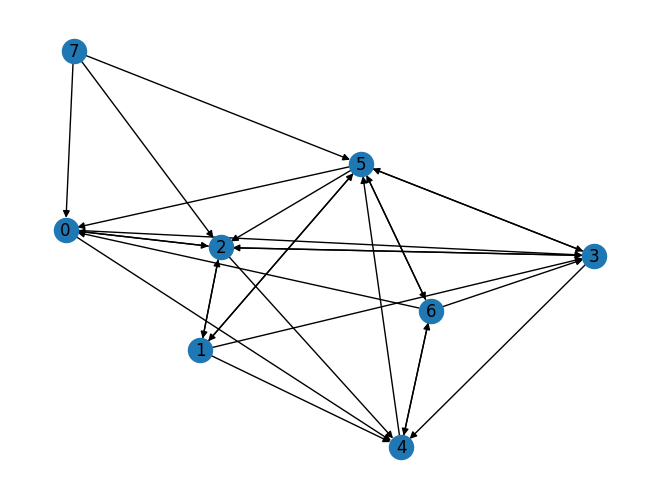

In [42]:
# plot graph structure
nx.draw(graph, with_labels=True)

In [36]:
for i in graph.predecessors(0):
    print(i)

3
4
